# Clustering Analysis. How Different Metrics Affect Clustering Results
## Author: Ventsislav Yordanov

### Introduction to Cluster Analysis (Clustering)
Cluster analysis or clustering is a machine learning technique that involves the grouping of data points. If we have a set of data points, we can use a clustering algorithm to classify each data point to a specific group (cluster). The idea here is that the objects in the same group are more similar to each other than to those in other groups. Clustering is an [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning) and is a common technique for [statistical data analysis](https://en.wikipedia.org/wiki/Statistics) used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, data compression, bioinformatics and computer graphics. In data science, we can use cluster analysis to find some insights from our data. After applying the clustering, we can see what is the group for each data point.

### Unsupervised Learning
In the previous section, we mentioned the words **unsupervised learning**. What is that? Unsupervised machine learning is a machine learning task that describes hidden structure from "unlabeled data". Since the examples given to the algorithm are unlabeled, there is no evaluation of the accuracy of that algorithm's output. This is one way to distinguish unsupervised learning from supervised learning and reinforcement learning.

Unlabeled data means that we don't have the "answer" for that data. This data is not marked. Some examples of an unlabeled data might include photos, audio records, news articles, etc. There is no "answer" for each record of the data, it just contains the data and nothing else. As opposed to unlabeled data, each observation of a labeled data typically contains some sort of "label", "class", "tag" that is somehow informative. For example, if we have some photos of dogs and cat, the labels for that photo can be "whether the photo contains a dog or cat".

### The Notion of a "Cluster"
How are clusters defined? The notion of a "cluster" cannot be precisely defined and that's why there are so many clustering algorithms. There is a common denominator: **a group of data objects**. Different people use different **cluster models**. For each cluster model, there are different algorithms that can be used. The notion of a cluster for the different algorithms varies significantly in its properties.

Typical cluster models include:
* **Connectivity models**: for example, [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) builds models based on distance connectivity
* **Centroid models**: for example, [the K-Means algorithm](https://en.wikipedia.org/wiki/K-means_algorithm) represents each cluster by a single mean vector
* **Distribution models**: clusters are modelled using statistical distributions, such as [multivariate normal distributions](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) used by the [expectation-maximization algortihm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)
* **Density models**: for example [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) and [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm) defines clusters as connected dense regions in the data space
* **Subspace models**: in [biclustering](https://en.wikipedia.org/wiki/Biclustering) (also known as co-clustering or two-mode-clustering), clusters are modeled with both cluster members and relevant attributes.
* **Group models**: some algorithms do not provide a refined model for their results and just provide the grouping information.
* **Graph-based models**: a [clique](https://tinyurl.com/nrejj3r), that is a subset of nodes in a graph such that every 2 nodes in the subset are connected by an edge can be considered as a prototypical form of a cluster.
* **Neural models**: the most well known [unsupervised](https://en.wikipedia.org/wiki/Unsupervised_learning) [neural network](https://en.wikipedia.org/wiki/Neural_network) is the [self-organizing map](https://en.wikipedia.org/wiki/Self-organizing_map) and these models can usually be characterized as similar to one or more of the above models, and including subspace models when neural networks implement a form of [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) or [Independent Component Analysis](https://en.wikipedia.org/wiki/Independent_component_analysis)

A clustering is essentially a set of clusters that usually contain all objects in the dataset. Additionally, it may specify a relationship of the clusters to each other, for example, a hierarchy of clusters embedded in each other. Clustering can be roughly distinguished as:
* **Hard clustering**: each object belongs to a cluster or not
* **Soft clustering** (also called [fuzzy clustering](https://en.wikipedia.org/wiki/Fuzzy_clustering)): each object belongs to each cluster with a certain likelihood

There are also more specific distinctions possible, for example:
* **Strict partitioning clustering**: each object belongs to exactly one cluster
* **Strict partitioning clustering with outliers**: an object can also belong to no cluster, and are considered [outliers](https://en.wikipedia.org/wiki/Anomaly_detection)
* **Overlapping clustering** (also called alternative clustering or multi-view clustering): each object may belong to more than one cluster
* **Hierarchical clustering**: objects that belong to a child cluster also belong to the parent cluster
* **Subspace clustering**: while an overlapping clustering, within a uniquely defined subspace, clusters are not expected to overlap

In the next sections, we will look how **K-Means** and **Hierarchical Clustering** work in details.

### K-Means Clustering
K-Means is an algorithm that allows you to cluster your data. It's a tool that can find the needed number of clusters in your data.

Step by step process
1. Choose the number "K" of clusters
2. Select at random "K" points, the centroids (these points are not necessarily from your dataset)
3. Assing each data point to the closest centroid (that forms "K" clusters)
4. Compute and place the new centroid of each cluster
5. Reassign each data point to the new closest centroid (that perform step 3 again)
    * if there is any reassignment, go to step 4
    * otherwise the algorithm converge

Here is a good explanation for ["What does it mean for an algorithm to converge?"](https://softwareengineering.stackexchange.com/questions/288777/what-does-it-mean-for-an-algorithm-to-converge)

We can look at the bottom graphic to see visually how K-Means work.
<img src="https://cdn-images-1.medium.com/max/800/1*KrcZK0xYgTa4qFrVr0fO2w.gif" alt="K-Means Algorithm" style="width: 400px;"/>
Source: [medium](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

#### Choosing the Right Number of Clusters
How do we decide the right number of clusters for our K-Means model?  
We need a way to understand or evaluate how a certain number of clusters performs compared to another number of clusters. So what kind of metric can we use upon our clustering algorithm that will tell us something about the final result?

##### WCSS
There is such a metric. It's called the **WCSS** (**Within Cluster Sum of Squares**).  
So, how is WCSS calculated?

Let's imagine that we have some 2-dimensional dataset and somehow we know that there are 3 clusters in our data.
We've got 3 sums of clusters. Each sum is calculated for each cluster. In fact, it's calculated within that cluster.

Now, let's just look at the sum for cluster 2 only.  
For every point inside cluster 2:
1. We get the distance between that point and the centroid of cluster 2
2. We're squaring the distance
3. We add the distance to the total sum for cluster 2

The WCSS is the total sum of all cluster sums.

Actually, WCSS is quite a good metric in terms of understanding or comparing the goodness of fit between 2 different K-Means clusters. When we're increasing the number of clusters, the WCSS will be always decreasing. But, what's the limit of that? How far will it be decreasing? How many maximum clusters can we have? We can have as many clusters as there are observations in our dataset. For examples, if we have a dataset with 50 observations, we can have maximum 50 clusters. In the case when the number of clusters and the number of observation are equal, the WCSS will be 0.

So, it's a good metric, but at the same time, it's constantly decreasing. That's because the higher the number of clusters or the less WCSS is, the better is the **goodness of fit**. We're fitting our data better and better.

##### The Elbow Method
But, how do we find the optimal [goodness of fit](https://en.wikipedia.org/wiki/Goodness_of_fit)?  
We can use the [elbow method](https://tinyurl.com/ybnc38vb) to find the optimal number of clusters. This method is quite arbitrary. In some situations, this method might not be so evident. Therefore somebody might pick one number of clusters, but someone else might pick another number of clusters. This is a judgment call that you need to make a data scientist.  

Yes, it can be arbitrary, but if you're not really sure, then you can just try the K-Means with a different number of clusters and see what the difference is. After that, you can make your judgment for that which "K" is optimal for your analysis. Ultimately, you're the person creating the analysis and you need to decide which number of clusters is optimal. The "elbow method" is just an approach that can help you to make that decision. But, at the end of the day, it's your decision.

##### Random Initialization Trap
What if we select the centroids with new locations? Will be able to change the results?
Yes, if with different selected centroids location, we can get different clustering results. We have a situation where the selection of the centroids locations at the very start of the algorithm can dictate the clustering results.

So, how we can solve this?
There is a modification to the K-Means algorithm that allows you to correctly select centroids. This modification is called **K-Means++**. K-Means uses centers which are far away from each other instead of random initialization.

K-Means++ step by step:
1. Choose one center uniformly at random from among the data points.
2. For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
3. Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
4. Repeat Steps 2 and 3 until k centers have been chosen.
5. Now that the initial centers have been chosen, proceed using standard K-Means clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### K-Means Example

#### Dataset Information
There is a big mall in a specific city that contains information about its clients. The clients that subscribe to the membership card. When the clients subscribe to the card they provided their information like their gender, their age, and their annual income. They use this card to buy all sorts of things in the mall. And therefore the mall has a purchase history of each of its client member. And that's how they obtained the last column "spending score".

The spending score is the amount computed for each of their clients based on several criteria including their income, the number of times per week they show up in the mall and the number of dollars they spent in a year. Based on all this they computed this metric that takes values between 1 and 100. So, the closer the spending score is to 1, the less client spends. And the closer the spending score is to 100, the more the client spends.

After collecting this data set, the company hired you as a machine earning scientist to segment their clients into different groups based on these two metrics: the annual income and the spending score. 

Since the mall has no idea of what this client segments might be or even has no idea about how many segments there would be, this is typically a clustering problem because we don't know the answers.

Dataset source: [Machine Learning A-Z™: Hands-On Python & R In Data Science](https://www.udemy.com/machinelearning/) course

#### Reading the Data

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Tidying the Data
Renaming the column names

In [3]:
data = data.rename(columns = {
    "CustomerID": "customer_id",
    "Genre": "gender",
    "Age": "age",
    "Annual Income (k$)": "annual_income",
    "Spending Score (1-100)": "spending_score"
})

In [4]:
data.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
features = data[["annual_income", "spending_score"]].values

#### Finding the Optimal Number of Clusters
Using the **elbow method** to find the optimal number of clusters. If you don't know how this method works you can find more information at [wikipedia](https://tinyurl.com/ybnc38vb)

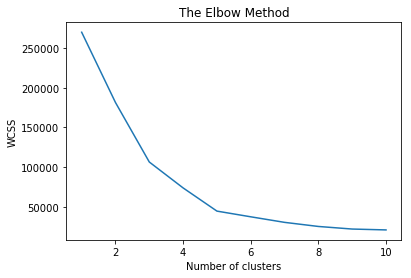

In [6]:
wcss = [] # In this array, we save each within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

From the graph above, we can see that the optimal value for the number of clusters is 5. It's 5 because if we increase the number of clusters more than 5, the WCSS doesn't decrease significantly. So, we'll use this number and pass it as a number of clusters for the K-Means algorithm.

#### Applying K-Means to the Data

In [7]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", n_init = 10, max_iter = 300, random_state = 0)
predicted_clusters_kmeans = kmeans.fit_predict(features)

#### Visualizing the Clusters

In [8]:
def plot_clusters(features, predicted_clusters, title, x_label, y_label):
    plt.scatter(features[predicted_clusters == 0, 0], features[predicted_clusters == 0, 1], s = 100, c = "red")
    plt.scatter(features[predicted_clusters == 1, 0], features[predicted_clusters == 1, 1], s = 100, c = "blue")
    plt.scatter(features[predicted_clusters == 2, 0], features[predicted_clusters == 2, 1], s = 100, c = "green")
    plt.scatter(features[predicted_clusters == 3, 0], features[predicted_clusters == 3, 1], s = 100, c = "cyan")
    plt.scatter(features[predicted_clusters == 4, 0], features[predicted_clusters == 4, 1], s = 100, c = "magenta")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "yellow", label = "Centroids")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

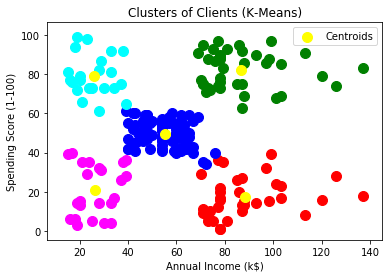

In [9]:
plot_clusters(features, predicted_clusters_kmeans, 
              "Clusters of Clients (K-Means)", "Annual Income (k$)", "Spending Score (1-100)")

We can try to describe our clusters by adding a label for each cluster.

In [10]:
def plot_clusters_with_labels(features, predicted_clusters, title, x_label, y_label, labels):
    plt.scatter(features[predicted_clusters == 0, 0], features[predicted_clusters == 0, 1], s = 100, c = "red", label = labels[0])
    plt.scatter(features[predicted_clusters == 1, 0], features[predicted_clusters == 1, 1], s = 100, c = "blue", label = labels[1])
    plt.scatter(features[predicted_clusters == 2, 0], features[predicted_clusters == 2, 1], s = 100, c = "green", label = labels[2])
    plt.scatter(features[predicted_clusters == 3, 0], features[predicted_clusters == 3, 1], s = 100, c = "cyan", label = labels[3])
    plt.scatter(features[predicted_clusters == 4, 0], features[predicted_clusters == 4, 1], s = 100, c = "magenta", label = labels[4])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "yellow", label = "Centroids")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

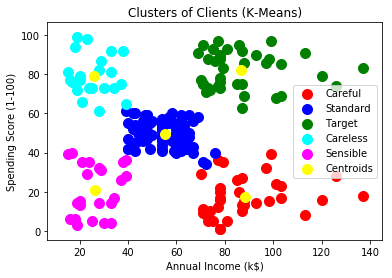

In [11]:
labels = ["Careful", "Standard", "Target", "Careless", "Sensible"]
plot_clusters_with_labels(features, predicted_clusters_kmeans, 
                          "Clusters of Clients (K-Means)", "Annual Income (k$)", "Spending Score (1-100)", labels)

#### Conclusions
Now we can show the results to the company. They can see that they have 5 different groups of customers.

### Intro to Hierarchical Clustering
Hierarchical clustering (also called hierarchical clustering analysis or HCA) is a method of cluster analysis which try to build a hierarchy of clusters. 

There are 2 types of hierarchical clustering
* **Agglomerative**: this is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged. One merge moves up the hierarchy.
* **Divisive**: this is a "top-down" approach: all observations start in one cluster, and splits are performed recursively. One split moves down the hierarchy.

In general, the merges and splits are determined in [greedy](https://en.wikipedia.org/wiki/Greedy_algorithm) manner. The results of hierarchical clustering are usually presented using [dendogram](https://en.wikipedia.org/wiki/Dendrogram). A dendrogram is a tree diagram frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering.

#### Cluster Dissimilarity
To decide which clusters should be combined (for agglomerative) and which clusters should be split (for divisive), a measure of dissimilarity between sets of observations is required. In most methods of hierarchical clustering this is achieved by use of appropriate [distance](https://en.wikipedia.org/wiki/Distance) [metric](https://tinyurl.com/h6zlql6) (a measure of distance between pairs of observations), and a **linkage criterion** which specifies the dissimilarity of the sets.

##### Metric
This measure defines how the distance between two data points is measured in general. The choice of an appropriate metric will influence the shape of clusters. Therefore, some elements may be close each other according to one distance, and farther away to another distance.

Some commonly used metrics are
* [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance): straight-line distance between two points in Euclidean space.
![Euclidean distance formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/c28af99d6b7c1ff13d2b79347e90fec407aa9ef0)
* [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry): the distance between two points is the sum of the absolute differences of their Cartesian coordinates
![Manhattan distance formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/6a2e701957744dcdf361a0dc0d79633491e17bfb)
* [Maximum distance](https://en.wikipedia.org/wiki/Uniform_norm)
![Maximum distance formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/c275abbd06f5262461af5fda82cf7f53eb8161e8)

For text or other non-numeric data, metrics such as the [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) or [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) are often used.

##### Linkage Criteria
This defines how the distance between two clusters is measured

Some commonly used linkage criteria between 2 datasets $A$ and $B$ are:
* Maximum or [complete-linkage clustering](https://en.wikipedia.org/wiki/Complete-linkage_clustering)
![Complete-linkage clustering formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/4ea47cb29523a267681865d874c59575c56860d0)
* Minimum or [single-linkage clustering](https://en.wikipedia.org/wiki/Single-linkage_clustering)
![Single-linkage clustering formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/d701e358058dbf66bb18b11a570a089a150ef356)
* Mean or average linkage clustering, or [UPGMA](https://en.wikipedia.org/wiki/UPGMA)
![Average linkage clustering formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/f41f68299e332d3d7e25ad5518e9933ce91025d3)

Other linkage criteria can include
* The sum of all intra-cluster variance.
* The increase in variance for the cluster being merged ([Ward's criterion](https://en.wikipedia.org/wiki/Ward%27s_method)). Ward's minimum variance criterion minimizes the total within-cluster variance
* The probability that candidate clusters spawn from the same distribution function (V-linkage).
* The product of in-degree and out-degree on a k-nearest-neighbor graph (graph degree linkage).
* The increment of some cluster descriptor (i.e., a quantity defined for measuring the quality of a cluster) after merging two clusters.

##### Additional Notes
Hierarchical clustering has the distinct advantage that **any valid measure of distance can be used**.

### Agglomerative Clustering Example
We have to solve the same problem for the "mall customers". Now, we will try to solve it using agglomerative clustering.

#### Finding the Optimal Number of Clusters
We'll use a dendrogram to find the optimal number of clusters.
A dendrogram can give us any ideas about the optimal number of clusters. 

What can we tell from the dendrogram that might be a good guide to use to select an optimal number of clusters?  
There is a nice giveaway that the dendrogram contains. That's the **vertical distance** because it is measuring the dissimilarity. One of the standard approaches is just to look for the **highest vertical distance** in you dendrogram. So, you look for the longest vertical line or part of a vertical line that will not cross any horizontal lines. Once, you find this vertical line, the recommended approach takes a threshold that will cross this largest distance. And then used that threshold to find the optimal number of clusters. The number of clusters is calculated by seeing how much vertical lines cross this threshold.

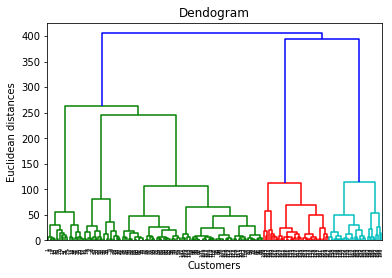

In [12]:
sch.dendrogram(sch.linkage(features, method = "ward"))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

From the dendrogram above we can see that the optimal number of clusters is 5.

#### Applying Agglomerative Clustering to the Data

In [13]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
predicted_clusters_ac = ac.fit_predict(features)
predicted_clusters_ac

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

#### Visualizing the Clusters

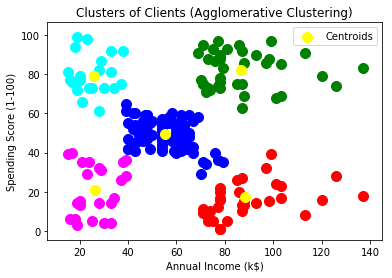

In [14]:
plot_clusters(features, predicted_clusters_ac, "Clusters of Clients (Agglomerative Clustering)",
              "Annual Income (k$)", "Spending Score (1-100)")

We can try to describe our clusters by adding a label for each cluster.

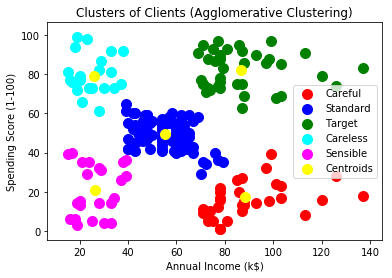

In [15]:
labels = ["Careful", "Standard", "Target", "Careless", "Sensible"]
plot_clusters_with_labels(features, predicted_clusters_ac, "Clusters of Clients (Agglomerative Clustering)",
                          "Annual Income (k$)", "Spending Score (1-100)", labels)

### Using another metrics for Agglomerative Clustering

Let's see how the different types of affinities with linkage "complete" and "average" change the results.
#### Additional Notes for the Linkage
In **complete-linkage** clustering, the link between two clusters contains all element pairs, and the distance between clusters equals the distance between those two elements (one in each cluster) that are farthest away from each other.
![complete-linkage](http://www.saedsayad.com/images/Clustering_complete.png)

In **average-linkage** hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. 
equals the distance between those two elements (one in each cluster) that are farthest away from each other.
![complete-linkage](http://www.saedsayad.com/images/Clustering_average.png)
Images source: [saedsayad](http://www.saedsayad.com/clustering_hierarchical.htm)

In [16]:
def plot_agglomerative_clustering(affinity, linkage):
    ac = AgglomerativeClustering(n_clusters = 5, affinity = affinity, linkage = linkage)
    predicted_clusters_ac = ac.fit_predict(features)
    title = "Agglomerative Clustering - affinity: " + affinity + ", linkage: " + linkage
    plot_clusters(features, predicted_clusters_ac, title, "Annual Income (k$)", "Spending Score (1-100)")

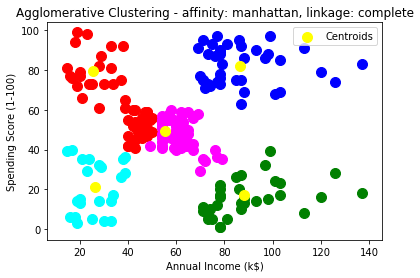

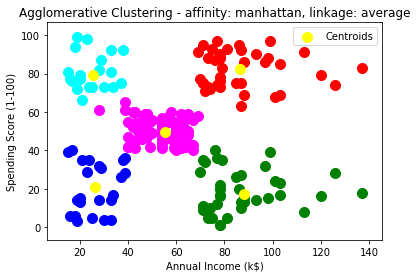

In [17]:
plot_agglomerative_clustering(affinity = "manhattan", linkage = "complete")
plot_agglomerative_clustering(affinity = "manhattan", linkage = "average")

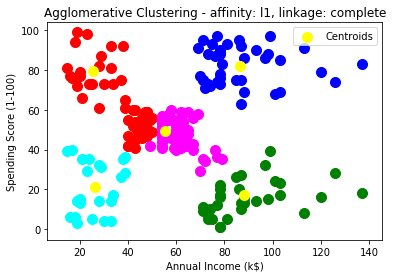

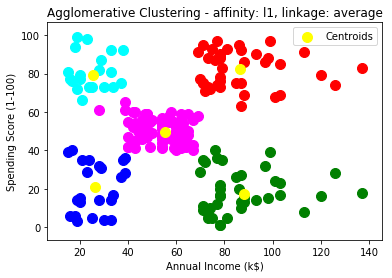

In [18]:
plot_agglomerative_clustering(affinity = "l1", linkage = "complete")
plot_agglomerative_clustering(affinity = "l1", linkage = "average")

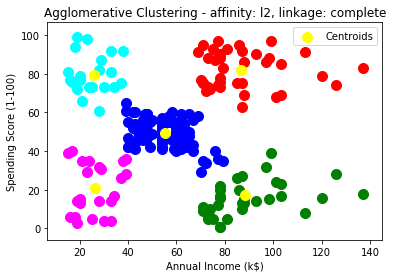

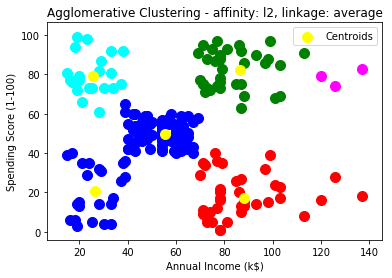

In [19]:
plot_agglomerative_clustering(affinity = "l2", linkage = "complete")
plot_agglomerative_clustering(affinity = "l2", linkage = "average")

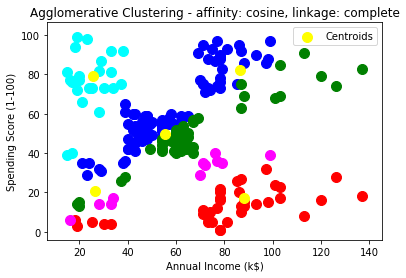

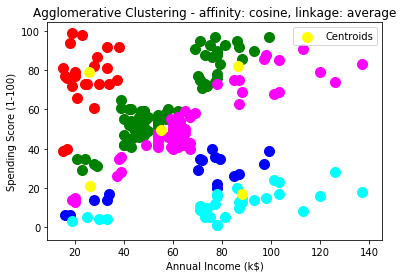

In [20]:
plot_agglomerative_clustering(affinity = "cosine", linkage = "complete")
plot_agglomerative_clustering(affinity = "cosine", linkage = "average")

### Conclusions
We can see that the different distance metrics, affect our result. It's important to understand the idea behind them very well before we use them. Also, if we don't know which metric to choose, we can experiment with several and compare the results.

### Resources
* https://en.wikipedia.org/wiki/Labeled_data
* https://stackoverflow.com/questions/19170603/what-is-the-difference-between-labeled-and-unlabeled-data/19172720#19172720
* https://en.wikipedia.org/wiki/Cluster_analysis
* https://en.wikipedia.org/wiki/Unsupervised_learning
* https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
* https://en.wikipedia.org/wiki/K-means_clustering
* https://en.wikipedia.org/wiki/Goodness_of_fit
* https://en.wikipedia.org/wiki/Elbow_method_(clustering)
* https://en.wikipedia.org/wiki/Hierarchical_clustering
* https://en.wikipedia.org/wiki/Greedy_algorithm
* https://en.wikipedia.org/wiki/Ward%27s_method
* http://www.saedsayad.com/clustering_hierarchical.htm
* http://research.med.helsinki.fi/corefacilities/proteinchem/hierarchical_clustering_basics.pdf
* https://en.wikipedia.org/wiki/Complete-linkage_clustering
* https://en.wikipedia.org/wiki/Single-linkage_clustering
* https://softuni.bg/trainings/1749/math-concepts-for-developers-september-2017
* https://www.udemy.com/machinelearning/